## Observations and Insights 

Capomulin and Ramicane were the most common and effective drug regimens employed in the study, with mice receiving Capomulin demonstrating slightly more favorable results in terms of final tumor volume.

Strong correlation (+0.84) is observed between average tumor volume and the weight of the subject mouse, indicating that logcially larger mice tended to have larger tumor volume values.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how="outer")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = len(combined_data['Mouse ID'].unique())
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_data.loc[combined_data['Mouse ID']=='g989']
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.loc[combined_data['Mouse ID']!='g989']
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#clean_data.describe()
mean = clean_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = clean_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = clean_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
std_dev = clean_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
SEM = clean_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary dataframe.
regimen_stats = pd.DataFrame({'Mean': mean,
              'Median':median,
              'Variance': variance,
              'Standard Deviation': std_dev,
                         'SEM':SEM})
regimen_stats.head(10)


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
# Google take the wheel ...
summary_stats= clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
summary_stats


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

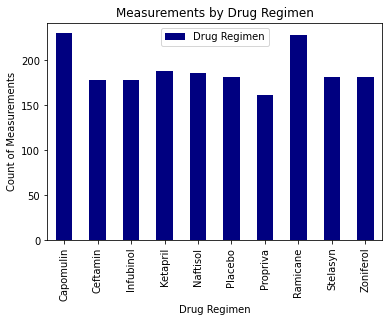

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# Should probably figure out how to get rid of the legend as its useless here
drug_group = combined_data.groupby('Drug Regimen')
measures = pd.DataFrame(drug_group['Drug Regimen'].count())

drug_chart=measures.plot(kind='bar', title='Measurements by Drug Regimen', color='navy')

drug_chart.set_xlabel('Drug Regimen')
drug_chart.set_ylabel('Count of Measurements')

plt.show()

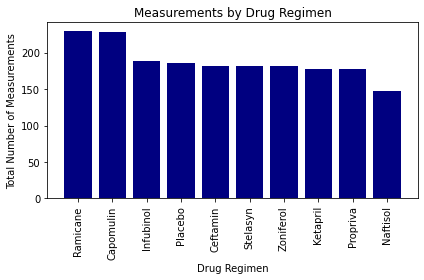

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# Unsquish X somehow
measures=clean_data['Drug Regimen'].value_counts()
labels=clean_data['Drug Regimen'].unique()

indexes = np.arange(len(labels))
width = 0.8
plt.bar(labels, measures, width=width, color='navy')
plt.title('Measurements by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Measurements')
plt.xticks(indexes, labels, rotation='vertical')
#plt.figure(figsize=(3,10))
plt.tight_layout()
plt.show() 


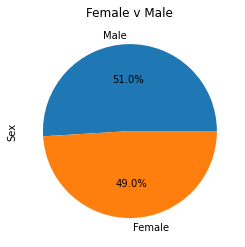

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
count=clean_data['Sex'].value_counts()
count.plot(kind='pie',autopct='%1.1f%%')
plt.title('Female v Male')
plt.show()


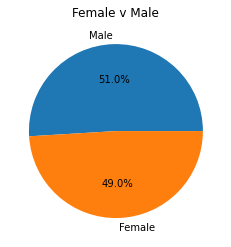

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count=clean_data['Sex'].value_counts()
plt.pie(count.values,labels=count.index.values,autopct='%1.1f%%')
plt.title('Female v Male')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Grab focus drugs
#drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


In [14]:
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = pd.DataFrame(clean_data.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_timepoint_df

# Merge max timepoint onto data_df
last_timepoint = pd.merge(clean_data, max_timepoint_df, on='Mouse ID')
last_timepoint.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    focus_drug_df = last_timepoint.loc[last_timepoint['Drug Regimen'] == drug]

    final_volume_df = focus_drug_df.loc[focus_drug_df['Timepoint'] == focus_drug_df['max_timepoint']]
    
    values = final_volume_df['Tumor Volume (mm3)']
    tumor_volume_data.append(values)
    
    # Calc and display IQR
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Check + quantify outliers
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')


IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


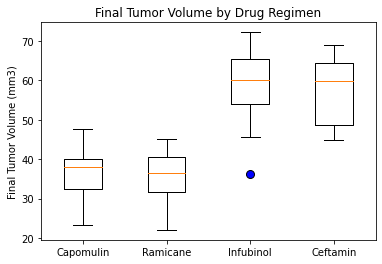

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

flierprops = dict(marker='o', markerfacecolor='b', markersize=8, markeredgecolor='black')

# Plot boxplot
plt.boxplot(tumor_volume_data, flierprops=flierprops)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Create df of mice treated with Capomulin + pick one
capomulin_mice = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']
capomulin_mice.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


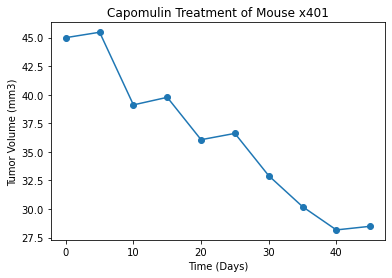

In [18]:
# Identify data points of a mouse treated with Capomulin
capomulin_mouse = clean_data.loc[clean_data['Mouse ID'] == 'x401']
capomulin_mouse.head()

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'], marker = 'o')

# Add labels and title to plot
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse x401")

# Display plot
plt.show()

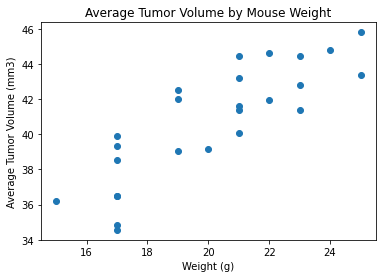

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor_volume = pd.DataFrame(capomulin_mice.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_tumor_volume.head()

# Pull in mouse weight values
argh = pd.merge(avg_tumor_volume,mouse_metadata,on='Mouse ID', how='inner')
argh.head()

# Create the scatterplot
x = argh['Weight (g)']
y = argh['avg_tumor_vol']
plt.scatter(x, y)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Mouse Weight')

plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume
on the Capomulin regimen is 0.84.


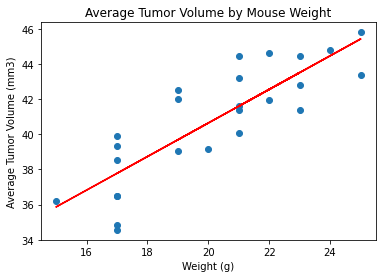

In [198]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(x,y)
print(f"""The correlation between mouse weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calc linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Mouse Weight')
plt.show()

In [ ]:
# Woot